In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from PIL import Image

In [2]:
(x_train, y_train),(x_test, y_test)=tf.keras.datasets.mnist.load_data()

In [3]:
x=pd.DataFrame(y_train)
x[0].value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: 0, dtype: int64

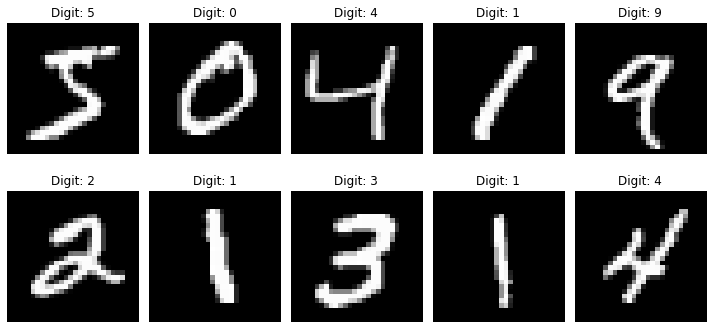

In [4]:
plt.figure(figsize=(10, 5))
for i in range(10):  # Display the first 10 images
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Digit: {y_train[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [5]:
len(x_train)

60000

In [6]:
len(x_test)

10000

In [7]:
x.value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

In [8]:
x=pd.DataFrame(y_train)
x[0].value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: 0, dtype: int64

THE PIXELS OF A IMAGE 

In [9]:
x_train[0].shape

(28, 28)

In [10]:
x_train[0].dtype

dtype('uint8')

In [11]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

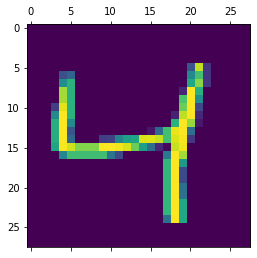

In [12]:
plt.matshow(x_train[2])

In [13]:
y_train[2]

4

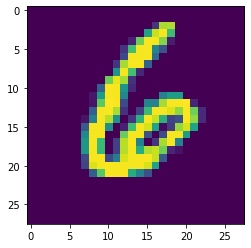

In [14]:
plt.imshow(x_train[13])

In [15]:
y_train[13]

6

In [16]:
x_train.shape

(60000, 28, 28)

In [17]:
x_train= x_train/255
x_test = x_test/255

In [18]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

FLATTENING

In [19]:
x_train_flattened = x_train.reshape(len(x_train), 28*28)


x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [20]:
x_train_flattened.shape

(60000, 784)

In [21]:
x_test_flattened.shape

(10000, 784)

TRAINING OUR MODEL

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4891 - accuracy: 0.8765
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3059 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2855 - accuracy: 0.9212
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2751 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2677 - accuracy: 0.9261


PREDICTING AND EVALUATING OUR MODEL BY TESTING

In [23]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2679 - accuracy: 0.9260


[0.26794958114624023, 0.9259999990463257]

In [24]:
model.predict(x_test_flattened)

array([[1.1831302e-05, 1.3549713e-10, 3.4081411e-05, ..., 7.1658170e-01,
        7.0265909e-05, 5.9288740e-04],
       [1.9383430e-04, 9.8404757e-07, 4.7206485e-01, ..., 4.1406790e-16,
        6.3820313e-05, 3.0004195e-13],
       [1.1050383e-06, 4.5905769e-01, 9.9056661e-03, ..., 5.4132938e-04,
        2.8757453e-03, 1.8653274e-04],
       ...,
       [1.6751770e-11, 3.6891046e-11, 1.6050972e-08, ..., 3.9717447e-06,
        1.8043540e-05, 2.7207985e-05],
       [8.8395895e-09, 3.3343213e-08, 2.7163116e-08, ..., 5.2332192e-09,
        3.4672022e-04, 1.1372707e-08],
       [4.9834135e-08, 9.3479085e-16, 2.1500525e-06, ..., 1.2451315e-13,
        1.6877314e-09, 1.4917781e-12]], dtype=float32)

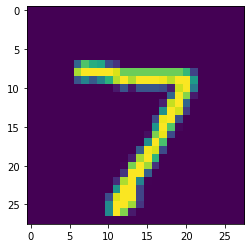

In [25]:
plt.imshow(x_test[0])

In [26]:
y_predict=model.predict(x_test_flattened)
y_predict[0]


array([1.1831302e-05, 1.3549713e-10, 3.4081411e-05, 1.4755279e-02,
       8.7486535e-07, 6.6076100e-05, 1.0740628e-09, 7.1658170e-01,
       7.0265909e-05, 5.9288740e-04], dtype=float32)

In [27]:
np.argmax(y_predict[0])

7

In [28]:
y_test[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [29]:
y_predicted_labels= [np.argmax(i) for i in y_predict]
y_predicted_labels[0:5]

[7, 2, 1, 0, 4]

In [30]:
cm =tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    2,    2,    0,    5,    6,    2,    3,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   5,    7,  935,   14,    7,    2,   11,   11,   37,    3],
       [   2,    0,   22,  938,    0,   11,    2,   11,   18,    6],
       [   1,    1,    6,    1,  919,    0,   10,    4,   11,   29],
       [   9,    3,    2,   49,   11,  747,   18,    6,   40,    7],
       [  10,    3,    8,    1,    8,    8,  914,    2,    4,    0],
       [   1,    7,   24,    9,    7,    0,    0,  957,    3,   20],
       [   4,    6,    7,   25,    9,   18,    9,   12,  880,    4],
       [  10,    7,    1,   14,   30,    5,    0,   32,   10,  900]])>

Text(69.0, 0.5, 'Truth')

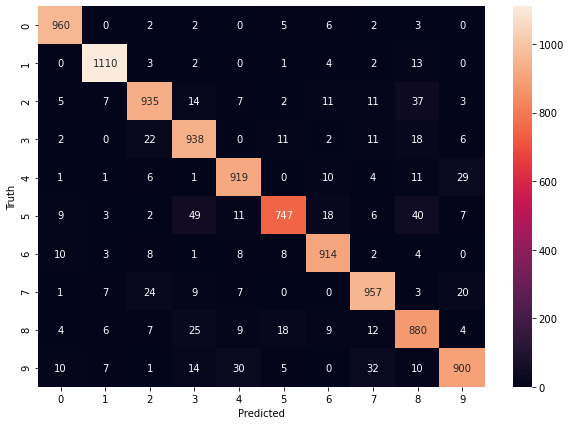

In [31]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

ADDING HIDDEN LAYER

In [32]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    tf.keras.layers.Dense(10,  activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2895 - accuracy: 0.9198
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1345 - accuracy: 0.9611
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0974 - accuracy: 0.9712
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0755 - accuracy: 0.9774
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0603 - accuracy: 0.9821


In [33]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0829 - accuracy: 0.9760


[0.08290567994117737, 0.9760000109672546]

In [34]:
y_predict = model.predict(x_test_flattened)
y_predicted_labels= [np.argmax(i) for i in y_predict]

In [35]:
y_predicted_labels

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 2,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 6,
 4,
 2,


In [36]:
cm= tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

In [37]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    1,    1,    1,    4,    4,    3,    2,    3],
       [   0, 1120,    4,    2,    0,    1,    2,    2,    4,    0],
       [   1,    1, 1008,    7,    4,    0,    2,    4,    5,    0],
       [   0,    0,    3,  992,    1,    0,    1,    7,    2,    4],
       [   0,    0,    1,    0,  963,    0,    7,    3,    1,    7],
       [   1,    1,    0,   15,    1,  859,    5,    1,    6,    3],
       [   3,    3,    1,    1,    5,    3,  939,    0,    3,    0],
       [   0,    3,   10,    2,    0,    1,    0, 1007,    1,    4],
       [   1,    0,    3,   13,    5,    5,    1,    5,  941,    0],
       [   2,    4,    0,    7,   12,    3,    1,    7,    3,  970]])>

Text(69.0, 0.5, 'Truth')

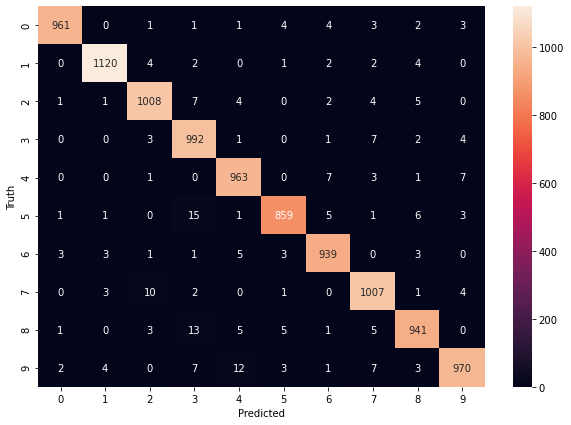

In [38]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

MAKING FLATTENED LAYER DIRECTLY IN THE MODEL SO WE DON'T HAVE TO RESHAPE

In [39]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100,  activation='relu'),
    tf.keras.layers.Dense(10,  activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2886 - accuracy: 0.9204
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1340 - accuracy: 0.9614
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0966 - accuracy: 0.9708
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0752 - accuracy: 0.9772
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0608 - accuracy: 0.9813


In [40]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100,  activation='relu'),
    tf.keras.layers.Dense(100,  activation='relu'),
    tf.keras.layers.Dense(100,  activation='relu'),
    tf.keras.layers.Dense(10,  activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2617 - accuracy: 0.9229
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1133 - accuracy: 0.9661
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0809 - accuracy: 0.9749
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0643 - accuracy: 0.9795
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0522 - accuracy: 0.9838


In [41]:
y_predict = model.predict(x_test)
y_predicted_labels= [np.argmax(i) for i in y_predict]

cm= tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

Text(69.0, 0.5, 'Truth')

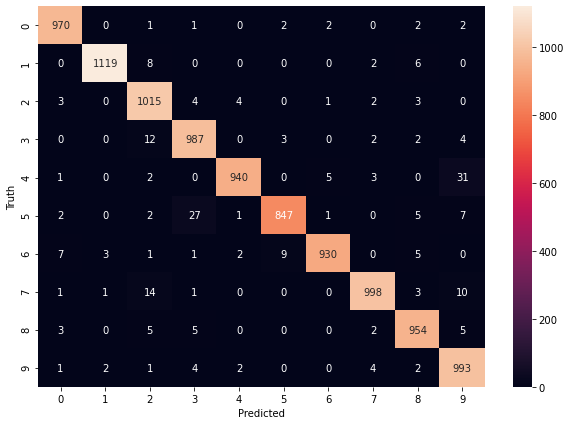

In [42]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [43]:
model.save("digit_recoginition.h5")